ALTERNATIVA 1) Sistema de recomendación

La idea consiste en crear un modelo de recomendacion. Pueden descargar los archivos desde el siguiente link:

https://drive.google.com/drive/folders/1F58VdEmIUakN7dOvaLeEmd5xCRrSJgB6?usp=sharing


Consigna:

- El primer paso consiste en lograr leer los archivos desde el drive y armar los 2 datasets, el de entrenamiento y el de validacion.

- Se pide ademas, crear un 3er conjunto de testeo donde deberan extraer de los primeros 2 un sample y no utilizar estos datos para entrenar. Es decir, del conjunto total de datos, armar 3 dfs, training, test y validation.

- Desarrollar un recomendador. El recomendador debe ser capaz de generar recomendaciones para TODOS los usuarios (incluyendo los cold start que no tengan visualizaciones en el set de train). Generar 20 recomendaciones por usuario.
- Las recomendaciones tienen que ser para cada account_id y hay que recomendar content_id.
- Los contenidos que recomienden, no tienen que haber sido vistos previamente por los usuarios (filtrar). Se acepta solamente que se recomiende este caso si el usuario vio el contenido solamente 1 vez y el mismo posee un rating que se encuentre en el ultimo decil.
- Evaluarlo con MAP.
- Se valora la originalidad en el codigo.


Recomendaciones:
- Al momento de leer los datos, los archivos llamados "base" forman el conjunto de training y los "test" el de test.
- Quedarse con las columnas user_id; item_id; raiting; ts
- Comenzar con algo simple
- Cuando el modelo ya este funcionando, mejorarlo e ir cubriendo los distintos requisitos.
- También pueden probar con un dataframe mayor: https://grouplens.org/datasets/movielens/



---



ALTERNATIVA 2) Redes Neuronales

Aqui la eleccion del conjunto de datos es parte del desafio. Como opciones se sugiere:

1.  Una red para poder clasificar observaciones (tal cual vimos en primer lugar).
2.  Utilizar imagenes como entrenamiento para predecir objetos o numeros en un conjunto desconocido (separar en training y test). En clase discutimos el tema de las patentes como una idea. Aca deberian aplicar la etapa de convolucion seguramente para dividir el dataset. Tambien podria ser analizar imagenes mediante filtros para detectar bordes, formas, etc.
3. Intentar predecir el valor de una accion o determinado bien mediante el uso de redes recurrentes.





---



ALTERNATIVA 3) Clustering

La idea principal es que primero consigan el dataset con el cual deberán trabajar. Una vez que tengan su dataset, la idea es que apliquen como mínimo los 2 modelos de clustering que vimos, el de K-Means y DBScan. Es necesario que incluyan una optimizacion de hiperparametros (según las metricas de Inercia y Silueta). Cuando ya tengan segmentados los datos, tienen que analizar y encontrar las caracteristicas de cada uno.



---



Fecha de entrega y exposición: 04/02 - 00 Hs. | 06/02 - 19 Hs.

Como desafio adicional, e**s necesario que suban el archivo a un repositorio de github (publico)** y enviar el link del mismo al siguiente mail: hugofolonier@gmail.com o por mensaje privado en Slack.



---



**ÍCARO - DATA SCIENCE 0423** | **ENTREGABLE 3 - ALTERNATIVAS**

**Integrantes Grupo 7:** Brown, Ignacio - Fedele, Delicia - Santos, Martín



---



###SECCIÓN I: BIBLIOTECAS Y LIBRERÍAS.

In [36]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install gdown pandas

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install pandas

In [41]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install --upgrade setuptools

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install numpy scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install --no-binary :all: lightfm

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install implicit

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import gdown
import pandas as pd
import os
import sklearn
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from datetime import datetime
from scipy.sparse import csr_matrix
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.data import Dataset
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k, reciprocal_rank
from sklearn.metrics import average_precision_score

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics import average_precision_score
from sklearn.cluster import KMeans

###SECCIÓN II: SISTEMA DE RECOMENDACIÓN.

In [49]:
#Punto 1): El primer paso consiste en lograr leer los archivos desde el drive y armar los 2 datasets, el de entrenamiento y el de validación.

In [50]:
carpeta_id = "C:\\Users\\Crix\Downloads\\DELICIA_DS\\ml-25m"

In [51]:
dataframes = []

In [52]:
#drive.mount('/content/drive')
#carpeta_id = '/content/drive/MyDrive/FORMACIONCONTINUA/DATA SCIENCE/Colab Notebooks/ENTREGABLES GRUPO 7/3) TRES/ml-25m'

In [53]:
if os.path.exists(carpeta_id):
    lista_archivos = os.listdir(carpeta_id)

In [54]:
archivos_csv = [archivo for archivo in lista_archivos if archivo.endswith('.csv')]

In [55]:
for archivo_csv in archivos_csv:
    ruta_completa = os.path.join(carpeta_id, archivo_csv)

In [56]:
datasets = {}

In [57]:
#Originalmente desde la web https://grouplens.org/datasets/movielens/, descargamos de las recomendaciones propuestas el DataSet MovieLens 25M.

#MovieLens 25M movie ratings. Stable benchmark dataset. 25 million ratings and one million tag applications applied to 62,000 movies by 162,000 users.
#Includes tag genome data with 15 million relevance scores across 1,129 tags. Released 12/2019.

#README.txt
#ml-25m.zip (size: 250 MB, checksum)

In [58]:
#La carpeta contiene 6 archivos *.csv y 1 archivo *.txt
#Se hizo un trabajo previo de mergeado en una notebook aparte, para trabajar con un solo DataSet, al cual llamamos "movie1.csv" a la versión final.

In [59]:
merged_dfe = pd.read_csv(os.path.join(carpeta_id, 'movies1.csv'))

In [60]:
merged_dfe['año'] = merged_dfe['año'].fillna(-1)
merged_dfe['año'] = merged_dfe['año'].astype(int)
merged_dfe.at[171346, 'año'] = 2001
merged_dfe['año'] = merged_dfe['año'].replace({-1: 2018})
merged_dfe['año'] = pd.to_datetime(merged_dfe['año'], format='%Y', errors='coerce')
merged_dfe['año'] = merged_dfe['año'].dt.year.astype(str).str.rstrip('.0')

In [61]:
merged_dfe['timestamp'] = merged_dfe['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y/%m/%d'))

In [62]:
merged_dfe

,userId,movieId,rating,timestamp,title,categoria_1,categoria_2,año,tag,imdbId,tmdbId
0,264,296,2.0,2018/11/28,Pulp Fiction,Comedy,Crime,1994,assassin,110912,680.0
1,521,296,5.0,2010/07/22,Pulp Fiction,Comedy,Crime,1994,Acting,110912,680.0
2,741,296,4.0,2009/12/31,Pulp Fiction,Comedy,Crime,1994,edgy,110912,680.0
3,871,296,4.5,2018/03/05,Pulp Fiction,Comedy,Crime,1994,crime,110912,680.0
4,997,296,5.0,2018/06/17,Pulp Fiction,Comedy,Crime,1994,Black comedy,110912,680.0
...,...,...,...,...,...,...,...,...,...,...,...
171343,153242,185053,3.0,2018/03/06,Kidnapped: The Hannah Anderson Story,Crime,Drama,2015,crime,4669306,341881.0
171344,156433,208465,4.5,2019/11/20,Jallikattu,Action,Crime,2019,chaos,8721556,564704.0
171345,159333,192829,4.5,2018/08/26,Parwaaz Hai Junoon,Adventure,Children,2018,Army,8032912,543005.0
171346,160256,161908,2.0,2018/05/05,Plum Blossom,Drama,Romance,2001,korea,266855,200995.0


In [63]:
merged_dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171348 entries, 0 to 171347
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       171348 non-null  int64  
 1   movieId      171348 non-null  int64  
 2   rating       171348 non-null  float64
 3   timestamp    171348 non-null  object 
 4   title        171348 non-null  object 
 5   categoria_1  171348 non-null  object 
 6   categoria_2  171348 non-null  object 
 7   año          171348 non-null  object 
 8   tag          171348 non-null  object 
 9   imdbId       171348 non-null  int64  
 10  tmdbId       171327 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 14.4+ MB


In [64]:
merged_dfe = merged_dfe.dropna(subset=['tmdbId'])

In [65]:
nulos = merged_dfe.isnull().any()
nulos
cant = merged_dfe.isnull().sum()
cant

userId         0
movieId        0
rating         0
timestamp      0
title          0
categoria_1    0
categoria_2    0
año            0
tag            0
imdbId         0
tmdbId         0
dtype: int64

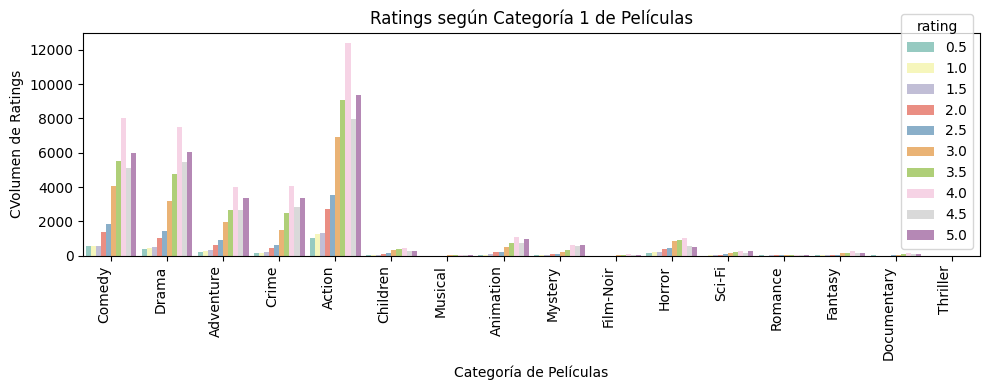

In [66]:
plt.figure(figsize=(10, 4))
sns.countplot(x='categoria_1', data=merged_dfe, palette='Set3', hue='rating', width=0.9,)

plt.xticks(rotation=90, ha='right')
plt.title('Ratings según Categoría 1 de Películas')
plt.xlabel('Categoría de Películas')
plt.ylabel('CVolumen de Ratings')
plt.tight_layout()
plt.show()

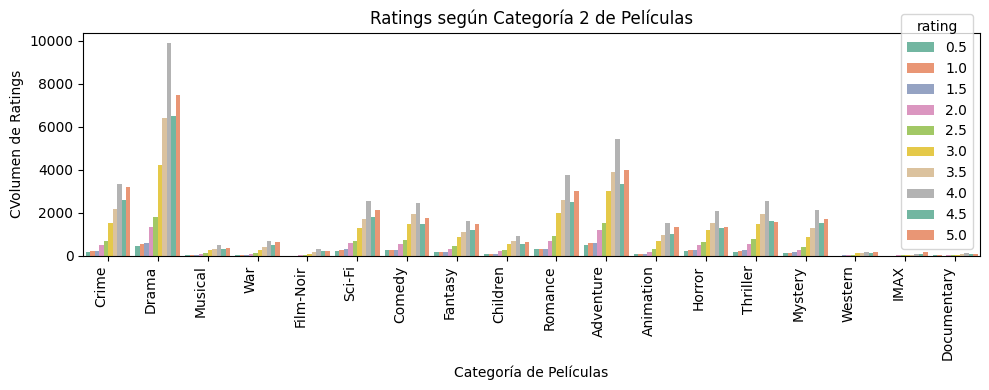

In [67]:
plt.figure(figsize=(10, 4))
sns.countplot(x='categoria_2', data=merged_dfe, palette='Set2', hue='rating', width=0.9,)

plt.xticks(rotation=90, ha='right')
plt.title('Ratings según Categoría 2 de Películas')
plt.xlabel('Categoría de Películas')
plt.ylabel('CVolumen de Ratings')
plt.tight_layout()
plt.show()

In [68]:
#A partir de aquí se arma los 2 DataSets, el de entrenamiento y el de validación.

In [69]:
#Se define el rango de calificaciones, se carga el conjunto de datos, y luego se divide en conjuntos de entrenamiento (trainset) y validación
#(validationset).

In [70]:
min_rating = 1.0
max_rating = 5.0

In [71]:
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(merged_dfe[['userId', 'movieId', 'rating']], reader)
trainset, validationset = train_test_split(data, test_size=0.2, random_state=42)

In [72]:
#Punto 2): Se pide ademas, crear un 3er conjunto de testeo donde deberan extraer de los primeros 2 un sample y no utilizar estos datos para entrenar.
#          Es decir, del conjunto total de datos, armar 3 dfs, training, test y validation.

In [73]:
trainset, testset = train_test_split(data, test_size=0.15, random_state=42)
validationset, testset = train_test_split(data, test_size=0.15, random_state=42)

_, testset = train_test_split(data, test_size=0.3, random_state=42)

testset

[(77896, 46976, 5.0),
 (63769, 59369, 4.5),
 (82410, 924, 5.0),
 (42097, 86320, 5.0),
 (130415, 1077, 5.0),
 (53084, 73321, 3.5),
 (1578, 48516, 5.0),
 (45535, 56171, 4.0),
 (9455, 134130, 5.0),
 (116587, 3169, 4.5),
 (15563, 58347, 4.5),
 (111384, 8783, 1.5),
 (35058, 2947, 0.5),
 (137495, 128622, 3.0),
 (51082, 1784, 3.0),
 (114731, 260, 4.0),
 (105924, 7022, 5.0),
 (86357, 1211, 5.0),
 (63096, 111659, 3.5),
 (79709, 118696, 2.5),
 (60142, 192209, 3.5),
 (105679, 118109, 4.0),
 (107432, 2177, 4.0),
 (56238, 72226, 3.5),
 (116319, 6711, 1.5),
 (3394, 194400, 4.0),
 (107249, 63082, 4.0),
 (148590, 90405, 2.0),
 (20376, 39, 3.0),
 (116295, 71254, 3.0),
 (42657, 178335, 3.0),
 (89910, 50, 5.0),
 (55878, 25825, 4.5),
 (30813, 1556, 2.0),
 (139015, 192209, 2.5),
 (120409, 47970, 4.5),
 (133451, 27238, 4.5),
 (25791, 62374, 4.5),
 (11228, 500, 2.0),
 (28826, 99728, 3.5),
 (162150, 247, 4.0),
 (124763, 87232, 3.0),
 (144727, 4973, 5.0),
 (33844, 167544, 3.5),
 (62707, 2105, 2.0),
 (65363, 48

In [74]:
#Punto 3 y 4): Desarrollar un recomendador. El recomendador debe ser capaz de generar recomendaciones para TODOS los usuarios (incluyendo los cold start
#              que no tengan visualizaciones en el set de train). Generar 20 recomendaciones por usuario.
#              Las recomendaciones tienen que ser para cada userId y hay que recomendar movieId.

In [75]:
#Se decide implementar un sistema de recomendación utilizando el algoritmo SVD (Singular Value Decomposition) proporcionado por la biblioteca Surprise.
#Se generan predicciones para el conjunto de prueba (testset) utilizando el modelo entrenado y se calcula la raíz del error cuadrático medio (RMSE) para
#evaluar la precisión del modelo. Luego genera las recomendaciones a todos los usuarios y maneja los "cold start" proporcionando recomendaciones basadas en
#el promedio de rating para usuarios con pocas o nuevas interacciones.

In [76]:
from collections import defaultdict

model = SVD()
model.fit(trainset)
predictions = model.test(testset)
accuracy.rmse(predictions)

all_users = trainset.all_users()
raw_user_ids = [trainset.to_raw_uid(user) for user in all_users]

recommendations = defaultdict(list)

for raw_user_id in raw_user_ids:
    user_movies = set(item for (user, item, rating) in testset if user == raw_user_id)
    all_movies = set(movie for movie in trainset.all_items())
    unseen_movies = list(all_movies - user_movies)

    user_predictions = [(item, model.predict(raw_user_id, item).est) for item in unseen_movies]

    top_recommendations = sorted(user_predictions, key=lambda x: x[1], reverse=True)[:10]

    recommended_movie_ids = [item for item, _ in top_recommendations]

    recommendations[raw_user_id] = recommended_movie_ids

# Manejo del "cold start" fuera del bucle for.
for raw_user_id in raw_user_ids:
    if not recommendations[raw_user_id]:
        # Si es un usuario "cold start", proporcionamos recomendaciones basadas en un promedio de rating.
        user_movies = merged_dfe[merged_dfe['userId'] == raw_user_id]['movieId']

        # Filtramos las películas con un rating igual o mayor a 4.5:
        high_rated_movies = merged_dfe[(merged_dfe['movieId'].isin(user_movies)) & (merged_dfe['rating'] >= 4.5)]

        # Calculamos el promedio de rating por película.
        movie_avg_ratings = high_rated_movies.groupby('movieId')['rating'].mean().reset_index()

        # Filtramos las películas con un promedio de rating igual o mayor a 4.5:
        recommended_movie_ids = movie_avg_ratings[movie_avg_ratings['rating'] >= 4.5]['movieId'].unique()[:10]

        recommendations[raw_user_id] = recommended_movie_ids

RMSE: 0.7551


In [79]:
#Se propone obtiener los títulos de las películas recomendadas cuyos IDs están en la lista recommended_movie_ids. Luego, se aplica una truncación a
#los títulos utilizando la notación de corte de lista de Python ([:30]) para limitar la longitud de cada título. Luego se itera a través de
#las recomendaciones para cada usuario. Se toman los primeros 10 títulos recomendados y se truncan a 30 caracteres. Luego, se imprime en la consola
#el ID del usuario y las versiones truncadas de los títulos recomendados.

In [78]:
for i, (raw_user_id, recommended_movie_ids) in enumerate(recommendations.items()):
    if i >= 5:  # Mostrar solo los primeros 5 usuarios
        break
    recommended_movies_titles = merged_dfe[merged_dfe['movieId'].isin(recommended_movie_ids)]['title'].tolist()
    truncated_titles = list(set([title[:30] for title in recommended_movies_titles]))
    print(f"userId {raw_user_id}: {[title[:30] for title in truncated_titles]}")

userId 140978: ['Godfather, The ', 'Usual Suspects, The ', 'Boot, Das (Boat, The) ', 'Spirited Away (Sen to Chihiro ', 'Sleuth ', 'Rear Window ', 'Chinatown ', 'Pulp Fiction ', 'Léon: The Professional (a.k.a.', 'Brazil ']
userId 29762: ["Amelie (Fabuleux destin d'Amél", 'Chinatown ', 'Lord of the Rings: The Return ', 'Wallace & Gromit: A Close Shav', "It's a Wonderful Life ", 'Pride and Prejudice ', 'Lawrence of Arabia ', 'My Neighbor Totoro (Tonari no ', 'Princess Mononoke (Mononoke-hi', 'Eternal Sunshine of the Spotle']
userId 84824: ['Boot, Das (Boat, The) ', 'Witness for the Prosecution ', 'Before Sunset ', 'Trainspotting ', 'Matrix, The ', 'Princess Mononoke (Mononoke-hi', 'Memento ', 'Lord of the Rings: The Fellows', 'Good, the Bad and the Ugly, Th', 'Paris, Texas ']
userId 102264: ['American Beauty ', 'Spirited Away (Sen to Chihiro ', 'Fight Club ', 'Lord of the Rings: The Return ', 'Hedwig and the Angry Inch ', 'Pulp Fiction ', 'Godfather: Part II, The ', 'Shawshank Redemption,

In [80]:
#Se agrega unas líneas de código en caso de que se quieran visibilizar las recomendaciones en un archivo exportable *.txt.

In [83]:
#with open('output.txt', 'w') as file:
#    for raw_user_id, recommended_movies in recommendations.items():
#        truncated_titles = [title[:100] for title in recommended_movies]
#        file.write(f"userId {raw_user_id}: {truncated_titles}\n")

In [84]:
#Punto 5): Evaluación con RMSE y MAP.

In [85]:
#Se decidió utilizar para evaluar el sistema de recomendacion, la caracterísitica de "sensibilidad a errores grandes" como relevante, dado que se
#sabe que la evaluación depende también de varios factores, como la naturaleza específica del problema, los objetivos del sistema y las preferencias
#del evaluador. RMSE penaliza fuertemente los errores grandes. Si un modelo tiene algunos errores grandes, el RMSE se verá afectado significativamente.
#Esto puede ser apropiado si se desea minimizar la magnitud de los errores en todas las predicciones. Por el contrario, MAP puede ser menos sensible a
#errores grandes, ya que se centra en la precisión relativa y la posición de los elementos relevantes en la lista de recomendaciones.

In [86]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.8677
RMSE: 0.8676836352513342


In [87]:
#La escala del RMSE (Root Mean Squared Error) depende de la escala de las calificaciones en el conjunto de datos. En el contexto de un sistema de
#recomendación donde las calificaciones suelen estar en una escala de 1 a 5 (por ejemplo, en una escala de estrellas), el RMSE típicamente oscilará
#en el rango de 0 a 4 (o más, en casos excepcionales).

#La interpretación del RMSE es que valores más bajos indican un mejor rendimiento del modelo, ya que representan una menor diferencia entre las
#calificaciones predichas y reales. Un RMSE de 0 indicaría que las predicciones del modelo coinciden perfectamente con las calificaciones reales en
#el conjunto de prueba.

In [88]:
#Se decide proporcionar una manera de interpretar el rendimiento del modelo de recomendación en términos de niveles descriptivos de MAP (Mean Average Precision),
#lo que puede hacer que la evaluación sea más comprensible y contextual para los usuarios o stakeholders. Establecer umbrales y niveles de rendimiento
#personalizados permite ajustar la interpretación del rendimiento del modelo según los criterios específicos de la aplicación.

In [89]:
rmse_thresholds = [0.0, 0.3, 0.7, 1.0]
map_performance_levels = ['Bajo','Aceptable','Muy Bueno','Excelente']  # Definir tus propios niveles de rendimiento para MAP

model = SVD()
model.fit(trainset)
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

#Asocia el rendimiento de MAP según los umbrales de RMSE.
map_performance = None

for i, threshold in enumerate(rmse_thresholds):
    if rmse <= threshold:
        map_performance = map_performance_levels[i]
        break

print(f"RMSE: {rmse}")
print(f"Performance de MAP asociada: {map_performance}")

RMSE: 0.8669
RMSE: 0.8669114524354853
Performance de MAP asociada: Excelente


In [90]:
#Definimos un rango de umbral de RMSE que es acorde a lo que se necesita.
#En RMSE, se evalúa:

#         RMSE entre 0.0 y 0.5: Excelente. Asignar un nivel alto de rendimiento para el MAP dentro de este rango.

#         RMSE entre 0.5 y 1.0: Muy Bueno. Asignar un nivel medio de rendimiento para el MAP dentro de este rango.

#         RMSE entre 1.0 y 1.5: Aceptable. Asignar un nivel moderado de rendimiento para el MAP dentro de este rango.

#         RMSE mayor a 1.5: Bajo. Asignar un nivel bajo de rendimiento para el MAP dentro de este rango.


#En MAP, se evalúa:

#         MAP cercano a 0: No se logró ninguna precisión en las recomendaciones.

#         MAP cercano a 1: Todas las recomendaciones realizadas son relevantes y están en la posición correcta en la lista ordenada.

In [91]:
#Se decide calcular el puntaje de MAP (Mean Average Precision) para evaluar el rendimiento del modelo de recomendación en función de las predicciones
#generadas y las películas reales que los usuarios han consumido. Medimos entonces la precisión promedio de la relevancia de los elementos recomendados
#en comparación con los elementos realmente consumidos por los usuarios en el conjunto de prueba.

In [92]:
predictions = model.test(testset)

true_values = []
predicted_values = []

for raw_user_id, recommended_movies in recommendations.items():
    try:
        user_id = trainset.to_inner_uid(raw_user_id)
    except ValueError:
        continue

    true_movies = [item for (uid, item, rating) in testset if uid == user_id]

    true_vector = np.in1d(recommended_movies, true_movies, assume_unique=True)
    predicted_vector = [1 if item in recommended_movies else 0 for item in recommended_movies]

    true_values.extend(true_vector)
    predicted_values.extend(predicted_vector)

if len(true_values) != len(predicted_values):
    raise ValueError("Longitud inconsistente entre true_values y predicted_values")

map_score = average_precision_score(true_values, predicted_values)
print("MAP:", map_score)

MAP: 0.00026311173478337136


In [93]:
#Como propuesta adicional se realiza un sistema de recomendación de películas utilizando el algoritmo de K-Means clustering y filtrado colaborativo.
#Se carga para eso un DataSet alternativo "movies2.csv", producto de una mejora en el mergeado anterior. 

In [94]:
merged_dfee = pd.read_csv(os.path.join(carpeta_id, 'movies2.csv'))

In [95]:
merged_dfee['timestamp'] = merged_dfee['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y/%m/%d'))

In [96]:
merged_dfee.head()

,userId,movieId,rating,timestamp,title,categoria_2,año,cat_cant
0,3,1089,4.0,2017/01/18,Reservoir Dogs,Mystery,1992,1329
1,12,1089,4.0,1999/10/24,Reservoir Dogs,Mystery,1992,1329
2,13,1089,4.5,2009/03/26,Reservoir Dogs,Mystery,1992,1329
3,14,1089,5.0,2017/09/23,Reservoir Dogs,Mystery,1992,1329
4,23,1089,5.0,1999/11/18,Reservoir Dogs,Mystery,1992,1329


In [97]:
#Se calcula el número total de calificaciones, la cantidad de películas únicas y la cantidad de usuarios únicos en el conjunto de datos.

In [98]:
n_ratings = len(merged_dfee['rating'])
n_movies = merged_dfee['movieId'].nunique()
n_users = merged_dfee['userId'].nunique()

print(f"Cantidad de raitings: {n_ratings}")
print(f"Cantidad de peliculas's: {n_movies}")
print(f"Cantidad de usuarios: {n_users}")
print(f"Promedio de ratings por usuario: {round(n_ratings/n_users, 2)}")
print(f"Promedio de ratings por peliculas: {round(n_ratings/n_movies, 2)}")

Cantidad de raitings: 144146
Cantidad de peliculas's: 273
Cantidad de usuarios: 66619
Promedio de ratings por usuario: 2.16
Promedio de ratings por peliculas: 528.01


In [99]:
merged_dfee['title'].value_counts()[0:10]

title
Reservoir Dogs                           34634
Christmas Story, A                       12980
Terminator 3: Rise of the Machines       11546
Man on Fire                               7605
American Graffiti                         7286
Now You See Me                            6767
Tarzan                                    6572
Snowpiercer                               4671
National Treasure: Book of Secrets        4571
Professional, The (Le professionnel)      4338
Name: count, dtype: int64

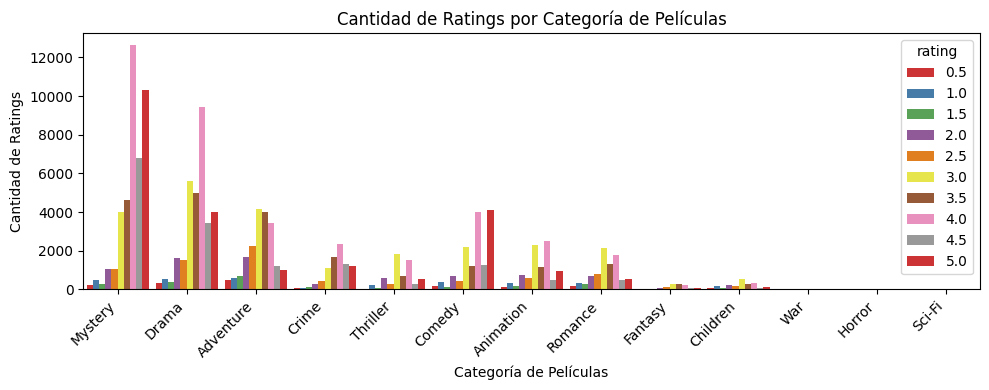

In [100]:
plt.figure(figsize=(10, 4))
sns.countplot(x='categoria_2', data=merged_dfee, palette='Set1', hue='rating', width=0.9,)

plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Ratings por Categoría de Películas')
plt.xlabel('Categoría de Películas')
plt.ylabel('Cantidad de Ratings')
plt.tight_layout()
plt.show()

In [101]:
#Se crea una tabla de pivote donde las filas son usuarios, las columnas son películas y los valores son las calificaciones de las películas por parte de 
#los usuarios. Los valores faltantes (NaN) se llenan con 0.

In [102]:
columnas = merged_dfee[['rating', 'userId','movieId']]

tabla = pd.pivot_table(index='userId', columns='movieId', values='rating',data=columnas)
tabla = tabla.fillna(0)

In [111]:
tabla

movieId,61,453,988,1011,1089,1351,1582,1899,2101,2320,...,200866,201276,203084,203142,203517,203531,203942,204028,206939,Cluster
userId,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
162535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
162536,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [104]:
tabla.shape

(66619, 273)

In [105]:
#Se convierte la tabla de pivote en una matriz dispersa para ser utilizada en el algoritmo de K-Means. Utiliza el algoritmo de K-Means para agrupar los usuarios en k clusters.

In [106]:
sparse_matrix = csr_matrix(tabla.values)

In [107]:
#Se agrega una nueva columna llamada 'Cluster' a la tabla de usuarios, que indica a qué cluster pertenece cada usuario. Se identifica el cluster al que pertenece un usuario 
#específico, encuentra otros usuarios en el mismo cluster, y genera recomendaciones para el usuario basado en las películas mejor calificadas por los usuarios del mismo cluster.
#Finalmente mapea los IDs de las películas a sus títulos correspondientes y presenta las recomendaciones para el usuario objetivo.

In [108]:
#Cantidad de clusters.
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
clusters = kmeans.fit_predict(sparse_matrix)

#Agregar la columna de clusters a tu tabla.
tabla['Cluster'] = clusters

#Usuario target.
usuario_objetivo = 3  

#Busca el cluster al que pertenece el usuario objetivo.
cluster_usuario_objetivo = tabla.loc[usuario_objetivo, 'Cluster']

#Filtra los usuarios dentro del mismo cluster.
usuarios_mismo_cluster = tabla[tabla['Cluster'] == cluster_usuario_objetivo].index

#Filtra las peliculas que no ha visto.
peliculas_no_vistas = tabla.loc[usuario_objetivo][tabla.loc[usuario_objetivo] == 0].index

#Ordena las peliculas no vistas según el rating mas alto del cluster.
recomendaciones_ids = tabla.loc[usuarios_mismo_cluster, peliculas_no_vistas].max(axis=0).sort_values(ascending=False).head(5).index

movie_title = dict(zip(merged_dfee['movieId'], merged_dfee['title']))
recomendaciones_titulos = [(movie_id, movie_title[movie_id]) for movie_id in recomendaciones_ids]

print(f"Recomendaciones para el usuario {usuario_objetivo} basadas en su cluster ({cluster_usuario_objetivo}):")
for movie_id, title in recomendaciones_titulos:
    print(f"movie id: {movie_id} - \"{title}\"")

Recomendaciones para el usuario 3 basadas en su cluster (4):
movie id: 61 - "Eye for an Eye "
movie id: 89000 - "Carancho "
movie id: 107408 - "Only Old Men Are Going to Battle (V boy idut odni stariki) "
movie id: 106473 - "One Piece Film Z "
movie id: 106441 - "Book Thief, The "


In [109]:
#Oportunidad de mejora, evaluar el Sistema de Recomendación con Precision o Recalls. No obstante, también se pueden utilizar métricas específicas de
#recomendación, como la precisión en el "top-k" (Top-K Precision), el NDCG (Normalized Discounted Cumulative Gain), o incluso métricas basadas en la tasa
#de clics si se está trabajando con datos de interacción del usuario. Se puede utilizar la librería scikit-learn, otras bibliotecas, como TensorFlow y PyTorch.

In [110]:
#FIN.